In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, nquad
from scipy.signal import square
import math
from numpy.fft import fft, ifft, fftfreq

In [2]:
def approximate(func, period, x, N):
    w = 2 * np.pi / period
    y = np.zeros_like(x)
    a0 = (2 / period) * quad(lambda value: func(value), 0, period)[0]
    for n in range(N):
        an = (2 / period) * quad(lambda value: func(value) * np.cos(n * w * value), 0, period)[0]
        bn = (2 / period) * quad(lambda value: func(value) * np.sin(n * w * value), 0, period)[0]
        y += an * np.cos(n * w * x) + bn * np.sin(n * w * x) 
    error = func(x) - y
    return error, y + a0 / 2

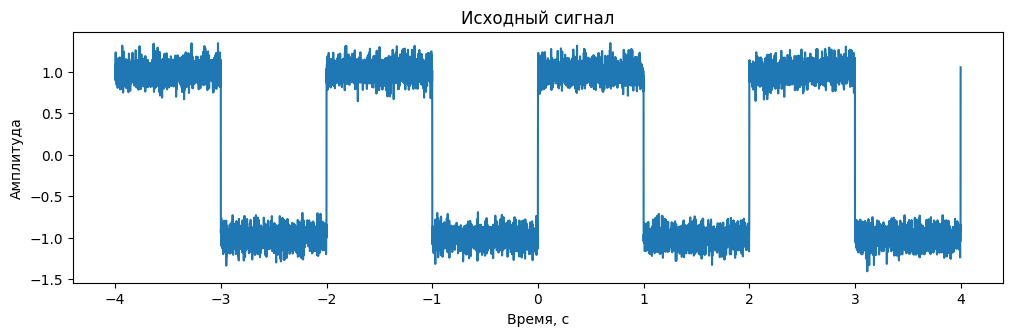

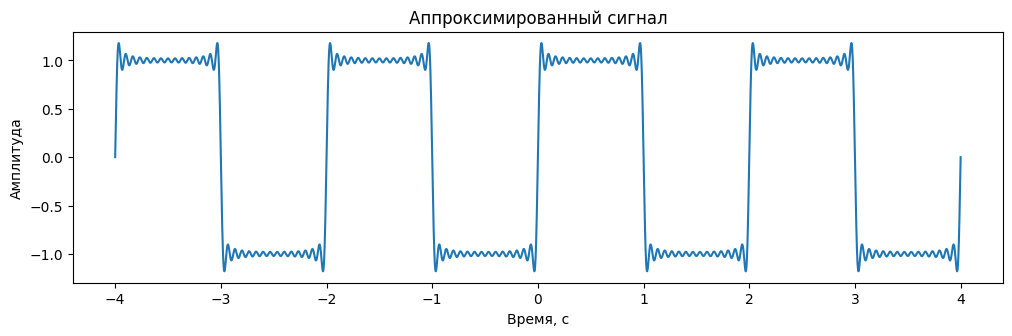

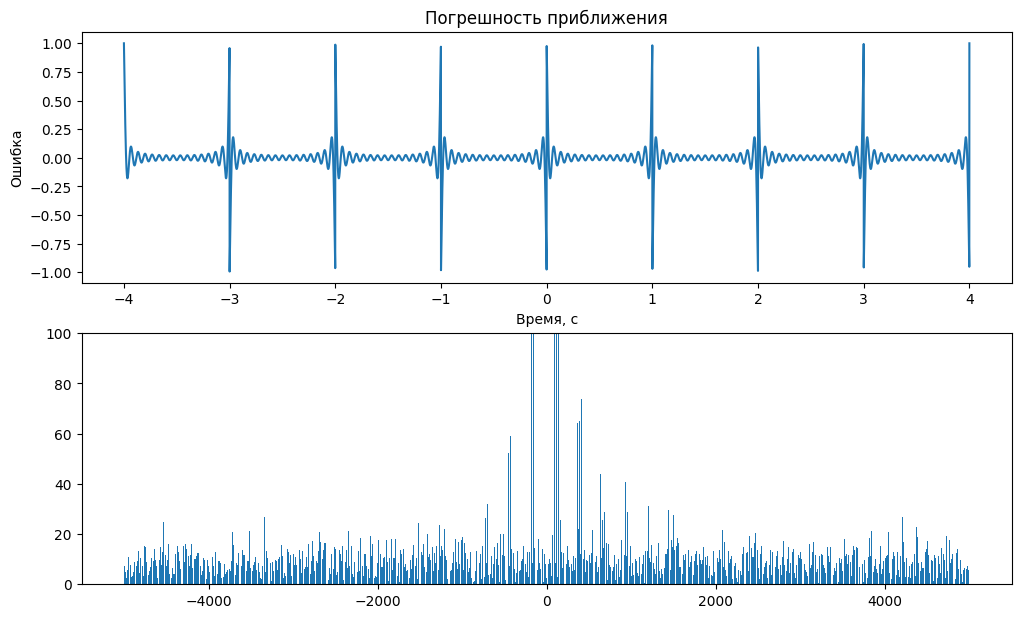

In [3]:
def x(t):
    period = 2  # Период сигнала
    duty_cycle = 0.5  # Коэффициент заполнения (отношение длительности "1" к периоду)
    return square(2 * np.pi * t / period, duty=duty_cycle)

N = 10000
period = 2
row = np.linspace(-4, 4, N)
y0 = x(row) + np.random.standard_normal(len(row)) / 10 # добавил шум
error, y1 = approximate(x, period, row, 30)

plt.figure(figsize=(12, 15))
plt.subplot(4, 1, 1)
plt.plot(row, y0)
plt.ylabel("Амплитуда")
plt.xlabel("Время, с")
plt.title("Исходный сигнал")

plt.figure(figsize=(12, 15))
plt.subplot(4, 1, 2)
plt.plot(row, y1)
plt.ylabel("Амплитуда")
plt.xlabel("Время, с")
plt.title("Аппроксимированный сигнал")

plt.figure(figsize=(12, 15))
plt.subplot(4, 1, 3)
plt.plot(row, error)
plt.ylabel("Ошибка")
plt.xlabel("Время, с")
plt.title("Погрешность приближения")

FFT = fft(y0)
FFTFREQ = fftfreq(N, 1 / N)
plt.subplot(4, 1, 4)
plt.ylim(0, 100)
plt.bar(FFTFREQ, np.abs(FFT))

plt.show()

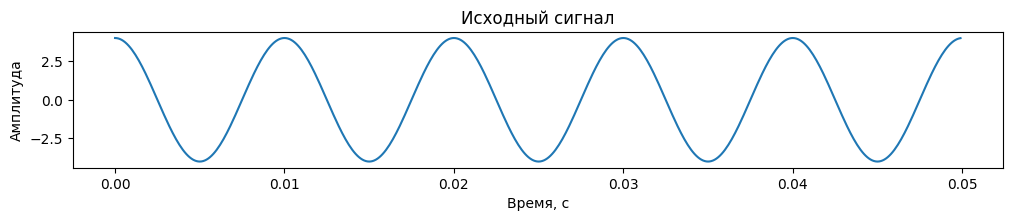

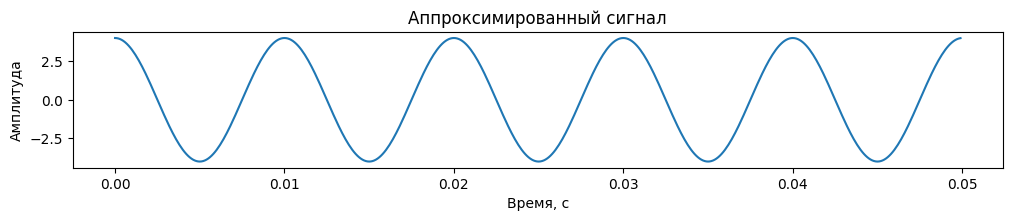

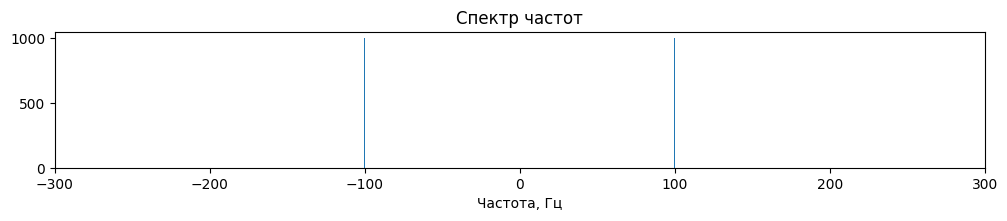

In [4]:
f = 100
V = 10000 # частота дискретизации 
T = 1.0 / f
a = 4

def x1(t):
    w = f * 2 * np.pi
    return np.cos(w * t) * a

row = np.arange(0, 5 * T, 1 / V)  # Временные отсчеты
y0 = x1(row)
error, y1 = approximate(x1, T, row, 70)

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(row, y0)
plt.ylabel("Амплитуда")
plt.xlabel("Время, с")
plt.title("Исходный сигнал")

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 2)
plt.plot(row, y1)
plt.ylabel("Амплитуда")
plt.xlabel("Время, с")
plt.title("Аппроксимированный сигнал")

FFT = fft(y0)
N = len(row)
FFTFREQ = fftfreq(N, 1 / V)

plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 3)
plt.xlim(-300, 300)
plt.bar(FFTFREQ, np.abs(FFT), label="hueta")
plt.xlabel("Частота, Гц")
plt.title("Спектр частот")

plt.show()

In [1]:
import this 

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
